## SVM Checker

In [3]:
%matplotlib inline
import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import scipy.ndimage






def example(num_samples=10, num_features=2, grid_size=20):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = svm.SVMTrainer(svm.Kernel.linear()) #Приймає на всіх наше ядро
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    xx = scipy.ndimage.zoom(xx, 5)
    yy = scipy.ndimage.zoom(yy, 5)
    Z = scipy.ndimage.zoom(Z, 5)



    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[ 1.52556536 -0.53607838]
 [ 0.19907647 -0.25021247]
 [ 1.17215963  1.88707721]
 [-0.14591812 -0.20292156]
 [ 0.73654599 -0.76333417]
 [ 1.74613336  0.24361139]
 [ 1.10027353 -0.36475069]
 [ 0.02442781 -1.74853415]
 [ 0.69434569  0.75039669]
 [ 0.62302565 -1.88973692]]
     pcost       dcost       gap    pres   dres
 0: -2.7390e+00 -6.1128e+00  2e+01  4e+00  2e+00
 1: -5.1178e+00 -5.9805e+00  4e+00  9e-01  4e-01
 2: -6.5074e+00 -8.3748e+00  3e+00  2e-01  1e-01
 3: -6.8263e+00 -6.9336e+00  1e-01  6e-03  3e-03
 4: -6.8696e+00 -6.8770e+00  8e-03  5e-05  2e-05
 5: -6.8724e+00 -6.8728e+00  4e-04  5e-08  2e-08
 6: -6.8724e+00 -6.8724e+00  5e-06  4e-10  2e-10
Optimal solution found.


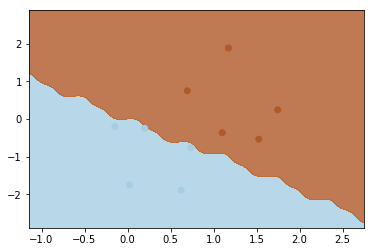

In [4]:
example()